In [1]:
# 다합쳐진 SCFI말고 경로별로 예측을 하더라구요. 그래서 경로별로 예측을 해보는것도 좋은 방법 
# 경로별로 영향을 받는 외부변수도 다를테니까 재밌어보이네요.

항만 대기량 자료는 16년 1월 1일부터, 지수 자료는 09년 10월 16일부터, 외부 변수에 대한 자료는 08년 1월 4일부터

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# SCFI csv 파일 불러오기
SCFI_df =  pd.read_csv('항로별 컨테이너 운임지수.csv')
print(SCFI_df.shape)
SCFI_df.head(5)

(613, 15)


,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),SCFI Shanghai-S America (Santos),SCFI Shanghai-W Japan (base port),SCFI Shanghai-E Japan (base port),SCFI Shanghai-SE Asia (Singapore),SCFI Shanghai-Korea (Pusan)
0,16-Oct-09,"1,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23-Oct-09,"1,009.05","1,277.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30-Oct-09,"1,035.74","1,340.00","1,364.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-Nov-09,"1,043.67","1,406.00","1,407.00","1,403.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13-Nov-09,"1,052.69","1,389.00","1,393.00","1,386.00","2,407.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
SCFI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date                                             613 non-null    object 
 1   SCFI Comprehensive Container Freight Rate Index  613 non-null    object 
 2   Shanghai-Europe (base port)                      612 non-null    object 
 3   SCFI Shanghai-Med (base port)                    611 non-null    object 
 4   SCFI Shanghai-WC America (base port)             610 non-null    object 
 5   SCFI Shanghai-EC America (base port)             609 non-null    object 
 6   SCFI Shanghai-Persian Gulf (Dubai)               608 non-null    object 
 7   SCFI Shanghai-ANZ (Melbourne)                    607 non-null    object 
 8   SCFI Shanghai-W Africa (Lagos)                   606 non-null    object 
 9   SCFI Shanghai-S Africa (Durban) 

In [5]:
# 항만대기량 csv 파일 불러오기
PC_df =  pd.read_csv('항만 대기량.csv')
print(PC_df.shape)
PC_df.head(5)

(2203, 9)


,Date,"Port Congestion Index - Containerships In Port, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, United Kingdom/Continent, m.TEU, 7dma","Port Congestion Index - Containerships In Port, Mediterranean/Black Sea, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, South East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, China P.R., m.TEU, 7dma"
0,01-Jan-2016,6.30,0.37,0.27,0.68,0.57,2.56,0.75,1.87
1,02-Jan-2016,6.29,0.37,0.27,0.68,0.57,2.55,0.74,1.84
2,03-Jan-2016,6.30,0.36,0.27,0.70,0.58,2.54,0.75,1.81
3,04-Jan-2016,6.30,0.35,0.28,0.70,0.58,2.53,0.77,1.80
4,05-Jan-2016,6.30,0.35,0.28,0.70,0.58,2.52,0.76,1.78


In [6]:
PC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 9 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Date                                                                                   2203 non-null   object 
 1   Port Congestion Index - Containerships In Port, m.TEU, 7dma                            2203 non-null   float64
 2   Port Congestion Index - Containerships In Port, East Coast North America, m.TEU, 7dma  2203 non-null   float64
 3   Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma  2203 non-null   float64
 4   Port Congestion Index - Containerships In Port, United Kingdom/Continent, m.TEU, 7dma  2203 non-null   float64
 5   Port Congestion Index - Containerships In Port, Mediterranean/Black Sea, m.TE

In [7]:
# 외부변수 csv 파일 불러오기
VAR_df =  pd.read_csv('외부변수.csv')
print(VAR_df.shape)
VAR_df.head(5)

(732, 10)


,Date,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,Total Containerships - % Idle/Laid Up/Scrubber Retrofit.1,"Containership 1,650/1,850 TEU FCC, G'less Newbuilding Prices","Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices",5 Year $10m Finance based on Libor 1st yr
0,04-Jan-2008,"25,708",481.5,NaN,NaN,41.0,NaN,63.0,NaN,2.45
1,11-Jan-2008,"25,708",457.5,NaN,NaN,41.0,NaN,63.0,NaN,2.42
2,18-Jan-2008,"25,708",432.5,NaN,NaN,41.0,NaN,63.0,NaN,2.38
3,25-Jan-2008,"25,708",419.5,NaN,NaN,41.0,NaN,63.0,NaN,2.32
4,01-Feb-2008,"25,670",434.5,NaN,NaN,42.0,NaN,63.0,NaN,2.30


In [8]:
# 외부변수 CSV 파일 전처리(결측치 제거)
VAR_df.isnull().sum()

Date                                                                     0
Clarksons Average Containership Earnings                                 0
HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam                      0
Total Containerships - % Idle/Laid Up/Scrubber Retrofit                313
Total Containerships - % Idle/Laid Up/Scrubber Retrofit.1              313
Containership 1,650/1,850 TEU FCC, G'less Newbuilding Prices             0
Containership 13,000/14,000 TEU Newbuilding Prices                      47
Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices      0
Containership 13,000/13,500 TEU G'less Newbuilding Prices              116
5 Year $10m Finance based on Libor 1st yr                                0
dtype: int64

In [9]:
# 일단 결측치가 있는 열들은 제외해보자 
# 항만 대기량을 사용하기 위해서 우리가 필요한 데이터는 2016년 1월 1일 이후임
# 근데 각 featue는 2016년 1월 1일 이후로 결측치가 없음 그렇기 때문에 아무것도 삭제하지 않아도 됨.
VAR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Date                                                                 732 non-null    object 
 1   Clarksons Average Containership Earnings                             732 non-null    object 
 2   HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam                  732 non-null    float64
 3   Total Containerships - % Idle/Laid Up/Scrubber Retrofit              419 non-null    float64
 4   Total Containerships - % Idle/Laid Up/Scrubber Retrofit.1            419 non-null    float64
 5   Containership 1,650/1,850 TEU FCC, G'less Newbuilding Prices         732 non-null    float64
 6   Containership 13,000/14,000 TEU Newbuilding Prices                   685 non-null    float64
 7   Containe

그래서 먼저 외부변수를 시계열 데이터로 변환

In [10]:
VAR_df['Date'] = pd.to_datetime(VAR_df['Date'])
# Clarksons Average Containership Earnings 안에 있는 ','를 없애주기
for i in range(732) :
    VAR_df['Clarksons Average Containership Earnings'][i] = VAR_df['Clarksons Average Containership Earnings'][i].replace(',','')
VAR_df['Clarksons Average Containership Earnings']= VAR_df['Clarksons Average Containership Earnings'].astype(float)

<ipython-input-10-e8df3a4d9b09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VAR_df['Clarksons Average Containership Earnings'][i] = VAR_df['Clarksons Average Containership Earnings'][i].replace(',','')


In [11]:
VAR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Date                                                                 732 non-null    datetime64[ns]
 1   Clarksons Average Containership Earnings                             732 non-null    float64       
 2   HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam                  732 non-null    float64       
 3   Total Containerships - % Idle/Laid Up/Scrubber Retrofit              419 non-null    float64       
 4   Total Containerships - % Idle/Laid Up/Scrubber Retrofit.1            419 non-null    float64       
 5   Containership 1,650/1,850 TEU FCC, G'less Newbuilding Prices         732 non-null    float64       
 6   Containership 13,000/14,000 TEU Newbuilding Prices

In [12]:
# SCFI CSV 파일 전처리(결측치 제거)
SCFI_df.isnull().sum()
SCFI_df.fillna(',', inplace=True)
print(SCFI_df.shape)
SCFI_df

(613, 15)


,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),SCFI Shanghai-S America (Santos),SCFI Shanghai-W Japan (base port),SCFI Shanghai-E Japan (base port),SCFI Shanghai-SE Asia (Singapore),SCFI Shanghai-Korea (Pusan)
0,16-Oct-09,"1,000.00",",",",",",",",",",",",",",",",",",",",",",",",",","
1,23-Oct-09,"1,009.05","1,277.00",",",",",",",",",",",",",",",",",",",",",",",","
2,30-Oct-09,"1,035.74","1,340.00","1,364.00",",",",",",",",",",",",",",",",",",",",",","
3,06-Nov-09,"1,043.67","1,406.00","1,407.00","1,403.00",",",",",",",",",",",",",",",",",",",","
4,13-Nov-09,"1,052.69","1,389.00","1,393.00","1,386.00","2,407.00",",",",",",",",",",",",",",",",",","
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,10-Dec-21,"4,810.98","7,597.00","7,314.00","7,300.00","10,644.00","3,538.00","4,459.00","7,442.00","6,441.00","10,105.00",298,288,"1,368.00",338
609,17-Dec-21,"4,894.62","7,603.00","7,329.00","7,419.00","10,983.00","3,666.00","4,490.00","7,454.00","6,431.00","10,161.00",295,272,"1,469.00",342
610,24-Dec-21,"4,956.02","7,671.00","7,420.00","7,444.00","11,351.00","3,753.00","4,544.00","7,461.00","6,480.00","10,297.00",282,271,"1,494.00",386
611,31-Dec-21,"5,046.66","7,751.00","7,535.00","7,681.00","11,579.00","3,860.00","4,683.00","7,476.00","6,473.00","10,276.00",337,268,"1,489.00",424


In [13]:
# 항만대기량 CSV 파일 전처리(결측치 제거)
PC_df.isnull().sum()

Date                                                                                     0
Port Congestion Index - Containerships In Port, m.TEU, 7dma                              0
Port Congestion Index - Containerships In Port, East Coast North America, m.TEU, 7dma    0
Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma    0
Port Congestion Index - Containerships In Port, United Kingdom/Continent, m.TEU, 7dma    0
Port Congestion Index - Containerships In Port, Mediterranean/Black Sea, m.TEU, 7dma     0
Port Congestion Index - Containerships In Port, East Asia, m.TEU, 7dma                   0
Port Congestion Index - Containerships In Port, South East Asia, m.TEU, 7dma             0
Port Congestion Index - Containerships In Port, China P.R., m.TEU, 7dma                  0
dtype: int64

항만 대기량 자료는 16년 1월 1일부터, 지수 자료는 09년 10월 16일부터, 외부 변수에 대한 자료는 08년 1월 4일부터이니 16년 1월 1일 이후 자료만 활용하엿음(상관 관계 분석을 위해서)

일단은 Date가 Object이고, 이 콤마 때문에 object로 되어 있는 경우도 많아서 이를 다 제거해줘야함.

In [14]:
# SCFI 시계열 데이터로 바꿔주기 
# SCFI_df.replace(',','', inplace = True) 이거는 ',' 하나에만 반응을 하는 것 같음
list = []
for i in range(1,11) :
    list.append(SCFI_df.columns[i])
list.append(SCFI_df.columns[13])
print(list)


for i in list :
        for j in range(613) :
            SCFI_df[i][j] = SCFI_df[i][j].replace(',', '')

['SCFI Comprehensive Container Freight Rate Index', 'Shanghai-Europe (base port)', 'SCFI Shanghai-Med (base port)', 'SCFI Shanghai-WC America (base port)', 'SCFI Shanghai-EC America (base port)', 'SCFI Shanghai-Persian Gulf (Dubai)', 'SCFI Shanghai-ANZ (Melbourne)', 'SCFI Shanghai-W Africa (Lagos)', 'SCFI Shanghai-S Africa (Durban)', 'SCFI Shanghai-S America (Santos)', 'SCFI Shanghai-SE Asia (Singapore)']


In [15]:
SCFI_df

,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),SCFI Shanghai-S America (Santos),SCFI Shanghai-W Japan (base port),SCFI Shanghai-E Japan (base port),SCFI Shanghai-SE Asia (Singapore),SCFI Shanghai-Korea (Pusan)
0,16-Oct-09,1000.00,,,,,,,,,,",",",",,","
1,23-Oct-09,1009.05,1277.00,,,,,,,,,",",",",,","
2,30-Oct-09,1035.74,1340.00,1364.00,,,,,,,,",",",",,","
3,06-Nov-09,1043.67,1406.00,1407.00,1403.00,,,,,,,",",",",,","
4,13-Nov-09,1052.69,1389.00,1393.00,1386.00,2407.00,,,,,,",",",",,","
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,10-Dec-21,4810.98,7597.00,7314.00,7300.00,10644.00,3538.00,4459.00,7442.00,6441.00,10105.00,298,288,1368.00,338
609,17-Dec-21,4894.62,7603.00,7329.00,7419.00,10983.00,3666.00,4490.00,7454.00,6431.00,10161.00,295,272,1469.00,342
610,24-Dec-21,4956.02,7671.00,7420.00,7444.00,11351.00,3753.00,4544.00,7461.00,6480.00,10297.00,282,271,1494.00,386
611,31-Dec-21,5046.66,7751.00,7535.00,7681.00,11579.00,3860.00,4683.00,7476.00,6473.00,10276.00,337,268,1489.00,424


In [16]:
idx = SCFI_df[SCFI_df['SCFI Shanghai-Korea (Pusan)']==','].index
SCFI_df.drop(idx, inplace=True)
SCFI_df.shape

(600, 15)

In [17]:
SCFI_df['Date'] = pd.to_datetime(SCFI_df['Date'])
for i in SCFI_df.columns[1:] :
    SCFI_df[i] = SCFI_df[i].astype(float)

In [18]:
SCFI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 13 to 612
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             600 non-null    datetime64[ns]
 1   SCFI Comprehensive Container Freight Rate Index  600 non-null    float64       
 2   Shanghai-Europe (base port)                      600 non-null    float64       
 3   SCFI Shanghai-Med (base port)                    600 non-null    float64       
 4   SCFI Shanghai-WC America (base port)             600 non-null    float64       
 5   SCFI Shanghai-EC America (base port)             600 non-null    float64       
 6   SCFI Shanghai-Persian Gulf (Dubai)               600 non-null    float64       
 7   SCFI Shanghai-ANZ (Melbourne)                    600 non-null    float64       
 8   SCFI Shanghai-W Africa (Lagos)         

In [19]:
SCFI_df

,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),SCFI Shanghai-S America (Santos),SCFI Shanghai-W Japan (base port),SCFI Shanghai-E Japan (base port),SCFI Shanghai-SE Asia (Singapore),SCFI Shanghai-Korea (Pusan)
13,2010-01-29,1333.93,1992.0,1899.0,1988.0,3081.0,699.0,1623.0,2511.0,1634.0,2558.0,311.0,310.0,292.0,219.0
14,2010-02-05,1377.20,2068.0,1947.0,2061.0,3132.0,701.0,1612.0,2551.0,1661.0,2567.0,322.0,321.0,301.0,220.0
15,2010-02-12,1396.21,2082.0,1965.0,2142.0,3157.0,708.0,1605.0,2599.0,1690.0,2570.0,328.0,327.0,303.0,223.0
16,2010-03-05,1402.87,2164.0,2035.0,2142.0,3150.0,713.0,1545.0,2446.0,1673.0,2564.0,311.0,311.0,306.0,215.0
17,2010-03-12,1378.09,2104.0,1988.0,2117.0,3140.0,703.0,1509.0,2459.0,1671.0,2572.0,310.0,310.0,302.0,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,2021-12-10,4810.98,7597.0,7314.0,7300.0,10644.0,3538.0,4459.0,7442.0,6441.0,10105.0,298.0,288.0,1368.0,338.0
609,2021-12-17,4894.62,7603.0,7329.0,7419.0,10983.0,3666.0,4490.0,7454.0,6431.0,10161.0,295.0,272.0,1469.0,342.0
610,2021-12-24,4956.02,7671.0,7420.0,7444.0,11351.0,3753.0,4544.0,7461.0,6480.0,10297.0,282.0,271.0,1494.0,386.0
611,2021-12-31,5046.66,7751.0,7535.0,7681.0,11579.0,3860.0,4683.0,7476.0,6473.0,10276.0,337.0,268.0,1489.0,424.0


항만 대기량 시계열 데이터로 수정(항만 대기량은 date만 object이기 때문에 이것만 수정)

In [20]:
PC_df['Date'] = pd.to_datetime(PC_df['Date'])

In [21]:
PC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 9 columns):
 #   Column                                                                                 Non-Null Count  Dtype         
---  ------                                                                                 --------------  -----         
 0   Date                                                                                   2203 non-null   datetime64[ns]
 1   Port Congestion Index - Containerships In Port, m.TEU, 7dma                            2203 non-null   float64       
 2   Port Congestion Index - Containerships In Port, East Coast North America, m.TEU, 7dma  2203 non-null   float64       
 3   Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma  2203 non-null   float64       
 4   Port Congestion Index - Containerships In Port, United Kingdom/Continent, m.TEU, 7dma  2203 non-null   float64       
 5   Port Congestion Index - Cont

여기까지가 각각의 CSV 파일을 데이터 수정

이제는 결합(CONCAT)

In [22]:
new_SCFI_df=SCFI_df.query('"2016-01-01"<= Date')
new_VAR_df = VAR_df.query('"2016-01-01"<= Date')
new_PC_df = PC_df.query('"2016-01-01"<= Date')

In [23]:
new_SCFI_df.shape

(307, 15)

In [24]:
new_VAR_df.shape

(315, 10)

In [25]:
new_PC_df.shape

(2203, 9)

In [26]:
#new_SCFI_df.to_csv('new_SCFI.csv',index=False)
#new_VAR_df.to_csv('new_VAR.csv',index=False)
#new_PC_df.to_csv('new_PC.csv',index=False)

# 크기가 안 맞았던 이유는
# new_SCFI는 2016년 1월 1일부터 일주일 간격으로 2022년 1월 7일까지 => 내 생각인데 공휴일같은 경우에는 안 나와서 그런듯?
# new_VAR은 2016년 1월 1일부터 일주일 간격으로 2022년 1월 7일까지  => 근데 이 두개 중에서도 차이나는거보면 중간에 누락값 있는 듯
# new_PC는 아무래도 하루 단위겠지?

In [27]:
first_merge_data = pd.merge(new_SCFI_df,new_VAR_df, how='outer',on='Date')

In [28]:
data = pd.merge(first_merge_data,new_PC_df, how='outer',on='Date')
data

,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),...,"Containership 13,000/13,500 TEU G'less Newbuilding Prices",5 Year $10m Finance based on Libor 1st yr,"Port Congestion Index - Containerships In Port, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, United Kingdom/Continent, m.TEU, 7dma","Port Congestion Index - Containerships In Port, Mediterranean/Black Sea, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, South East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, China P.R., m.TEU, 7dma"
0,2016-01-01,836.96,1232.0,1257.0,1518.0,2555.0,580.0,625.0,1486.0,517.0,...,99.0,2.06,6.30,0.37,0.27,0.68,0.57,2.56,0.75,1.87
1,2016-01-08,745.91,932.0,1022.0,1498.0,2542.0,462.0,743.0,1470.0,523.0,...,99.0,2.09,6.35,0.36,0.32,0.69,0.63,2.49,0.76,1.75
2,2016-01-15,680.22,740.0,869.0,1417.0,2457.0,385.0,640.0,1431.0,549.0,...,99.0,2.09,6.03,0.33,0.27,0.68,0.63,2.34,0.70,1.63
3,2016-01-22,615.77,545.0,629.0,1377.0,2420.0,306.0,563.0,1358.0,530.0,...,99.0,2.09,6.14,0.32,0.27,0.71,0.62,2.36,0.78,1.64
4,2016-01-29,591.51,469.0,488.0,1388.0,2466.0,278.0,525.0,1321.0,502.0,...,99.0,2.09,6.32,0.33,0.29,0.69,0.68,2.49,0.72,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,2022-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.56,0.77,0.76,1.11,0.89,2.46,1.05,1.93
2199,2022-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.61,0.82,0.76,1.10,0.90,2.49,1.02,1.96
2200,2022-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.51,0.82,0.75,1.09,0.88,2.48,1.00,1.94
2201,2022-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.42,0.82,0.75,1.07,0.87,2.46,0.96,1.92


In [29]:
data.dropna(axis=0, inplace=True)
data.shape

(307, 32)

In [30]:
data.to_csv('data.csv', index=False)

In [31]:
data.corr()

,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),SCFI Shanghai-S America (Santos),...,"Containership 13,000/13,500 TEU G'less Newbuilding Prices",5 Year $10m Finance based on Libor 1st yr,"Port Congestion Index - Containerships In Port, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, West Coast North America, m.TEU, 7dma","Port Congestion Index - Containerships In Port, United Kingdom/Continent, m.TEU, 7dma","Port Congestion Index - Containerships In Port, Mediterranean/Black Sea, m.TEU, 7dma","Port Congestion Index - Containerships In Port, East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, South East Asia, m.TEU, 7dma","Port Congestion Index - Containerships In Port, China P.R., m.TEU, 7dma"
SCFI Comprehensive Container Freight Rate Index,1.000000,0.992049,0.993001,0.960385,0.973386,0.978253,0.951535,0.963984,0.978536,0.956718,...,0.916000,-0.615114,0.775096,0.859755,0.925578,0.853143,0.574001,0.186128,0.606861,0.184439
Shanghai-Europe (base port),0.992049,1.000000,0.998551,0.925120,0.963526,0.975897,0.930376,0.949496,0.976369,0.955649,...,0.925952,-0.593359,0.731269,0.828271,0.901004,0.834826,0.523247,0.168386,0.556803,0.163446
SCFI Shanghai-Med (base port),0.993001,0.998551,1.000000,0.926862,0.961844,0.977255,0.928054,0.958375,0.972168,0.955172,...,0.924494,-0.603854,0.745857,0.831871,0.909173,0.836510,0.537511,0.178986,0.574341,0.173250
SCFI Shanghai-WC America (base port),0.960385,0.925120,0.926862,1.000000,0.958491,0.917689,0.934840,0.921172,0.924762,0.886430,...,0.861987,-0.628656,0.793823,0.857241,0.913127,0.835040,0.623041,0.195075,0.647604,0.199399
SCFI Shanghai-EC America (base port),0.973386,0.963526,0.961844,0.958491,1.000000,0.968406,0.934114,0.923742,0.963866,0.889723,...,0.942006,-0.556024,0.756907,0.843859,0.854871,0.845197,0.554401,0.228973,0.581709,0.225768
SCFI Shanghai-Persian Gulf (Dubai),0.978253,0.975897,0.977255,0.917689,0.968406,1.000000,0.923286,0.953738,0.971334,0.928351,...,0.929658,-0.581050,0.778843,0.839669,0.868918,0.836635,0.564052,0.250467,0.624582,0.246127
SCFI Shanghai-ANZ (Melbourne),0.951535,0.930376,0.928054,0.934840,0.934114,0.923286,1.000000,0.889458,0.957224,0.903913,...,0.859328,-0.612882,0.777648,0.856484,0.874936,0.790079,0.513966,0.257644,0.571323,0.262313
SCFI Shanghai-W Africa (Lagos),0.963984,0.949496,0.958375,0.921172,0.923742,0.953738,0.889458,1.000000,0.921125,0.926119,...,0.865094,-0.585692,0.849390,0.870513,0.938975,0.851472,0.662028,0.240907,0.706352,0.240468
SCFI Shanghai-S Africa (Durban),0.978536,0.976369,0.972168,0.924762,0.963866,0.971334,0.957224,0.921125,1.000000,0.945238,...,0.919138,-0.569304,0.728601,0.841968,0.874463,0.828997,0.506220,0.187106,0.531271,0.186960
SCFI Shanghai-S America (Santos),0.956718,0.955649,0.955172,0.886430,0.889723,0.928351,0.903913,0.926119,0.945238,1.000000,...,0.803828,-0.623043,0.679952,0.797177,0.911561,0.816966,0.524699,0.044019,0.537827,0.049166


<AxesSubplot:>

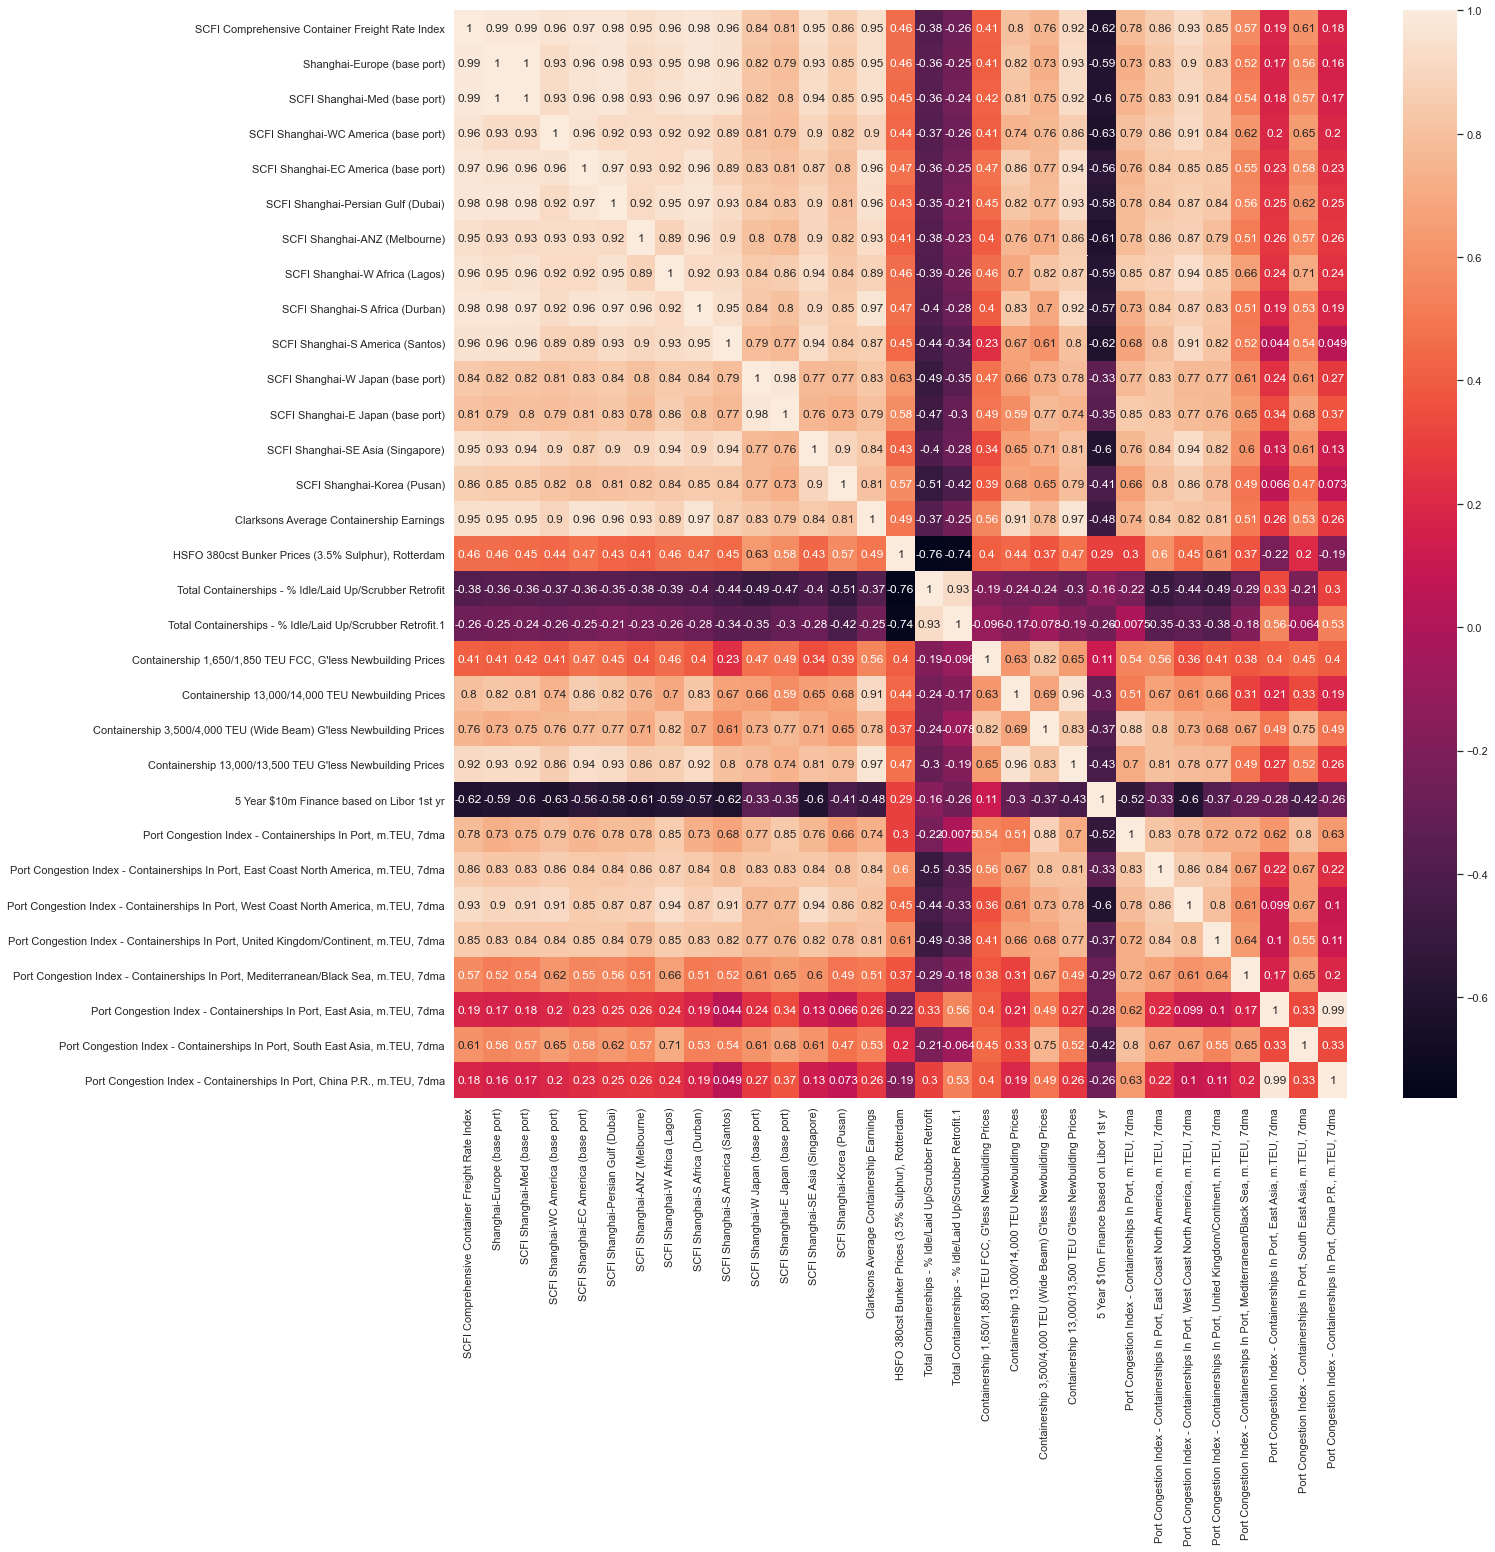

In [32]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(data.corr(), annot=True)